In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Adam_데분동아리/Credit score classification_pro02/train_02")
data

,Unnamed: 0,Month,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Score
0,0,3,12,1824.843333,3,4,3,3,685,4.0,3,26.822620,180,1,49.574949,3,0
1,1,2,12,3093.745000,3,4,3,-1,749,4.0,1,31.944960,404,1,49.574949,4,0
2,2,6,12,3093.745000,3,4,3,3,685,4.0,1,28.609352,184,1,49.574949,5,0
3,3,0,12,3093.745000,3,4,3,5,570,4.0,1,31.377862,185,1,49.574949,6,0
4,4,7,12,1824.843333,3,4,3,6,749,4.0,1,24.797347,186,1,49.574949,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,9,3359.415833,4,6,7,23,685,3.0,3,34.663572,307,1,35.104023,1,1
99996,99996,7,9,3359.415833,4,6,7,18,685,3.0,3,40.565631,308,1,35.104023,2,1
99997,99997,5,9,3359.415833,4,6,5729,27,671,3.0,1,41.255522,309,1,35.104023,1,1
99998,99998,4,9,3359.415833,4,6,7,20,749,3.0,1,33.638208,310,1,35.104023,4,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    100000 non-null  int64  
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  int64  
 11  Credit_Utilization_Ratio  100000 non-null  float64
 12  Credit_History_Age        100000 non-null  int64  
 13  Payment_of_Min_Amount     100000 non-null  in

In [5]:
data.columns

Index(['Unnamed: 0', 'Month', 'Occupation', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [6]:
train_x = data[['Month', 'Occupation', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour']]

In [7]:
train_y = data['Credit_Score']

In [8]:
# 100000개의 데이터를 70000개의 train과 30000개의 test 셋으로 나눈다. 
X_train , X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=111)

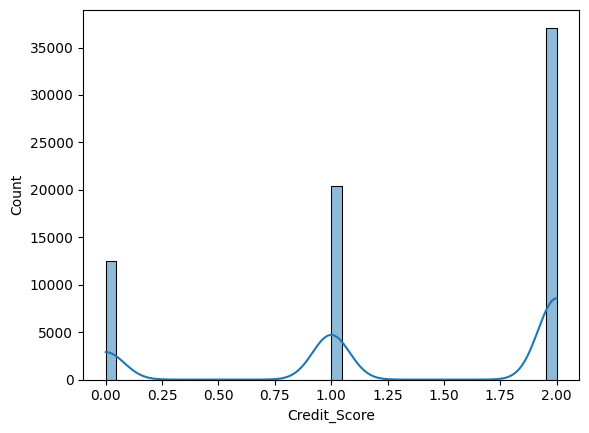

In [22]:
# train 정답값 분포 
sns.histplot(x=y_train,kde=True)
plt.show()

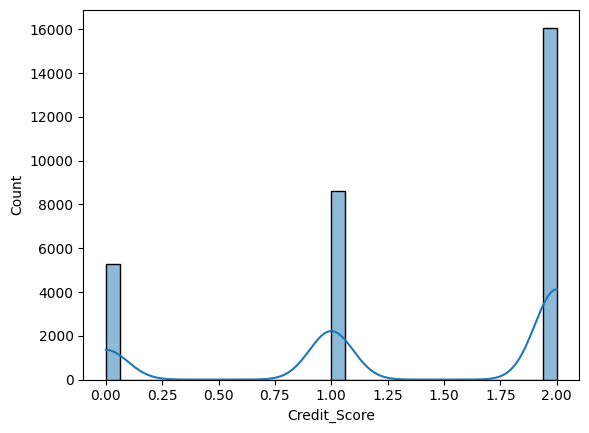

In [23]:
# test 정답 값 분포
sns.histplot(x=y_test,kde=True)
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
# 의사결정나무 
result_clf = DecisionTreeClassifier(max_depth=3)
    
#학습 진행
result_clf.fit(X_train, y_train)
#예측
pred = result_clf.predict(X_test)
    
#정확도 측정
accuracy = np.round(accuracy_score(y_test, pred),3)
precision = np.round(precision_score(y_test,pred, average='macro'),3)
recall = np.round(recall_score(y_test, pred, average='macro'),3)
f1 = np.round(f1_score(y_test, pred, average='micro'),3)
print('\n 검증 정확도 : {}, 검증 precision :{}, 검증 recall :{}, 검증 f1 :{}'.format(accuracy, precision, recall,f1))


 검증 정확도 : 0.652, 검증 precision :0.621, 검증 recall :0.64, 검증 f1 :0.652


<Axes: title={'center': 'importance features'}>

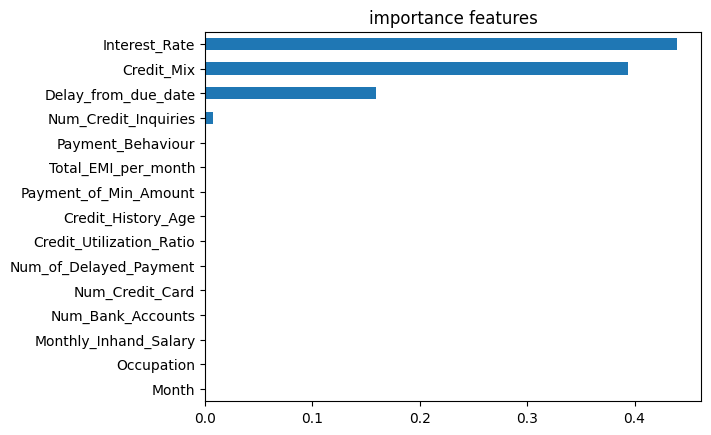

In [43]:
importances = pd.Series(result_clf.feature_importances_, X_train.columns)

plt.title(f'importance features')
importances.sort_values().plot.barh()

In [41]:
from sklearn.tree import plot_tree

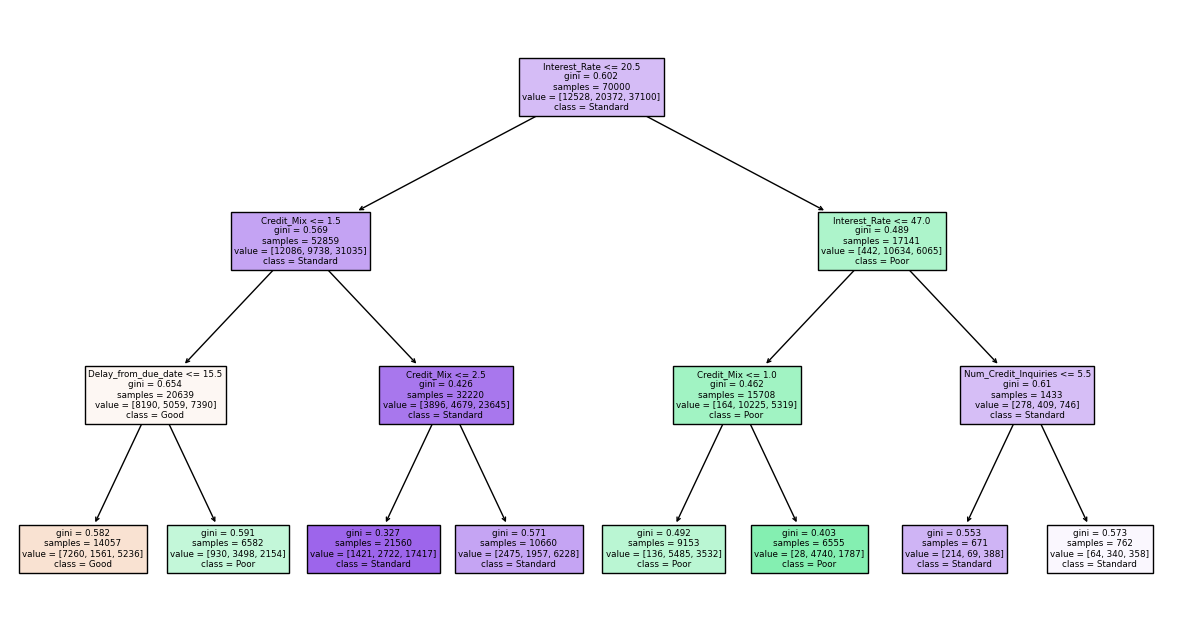

In [42]:
## Plot Tree with plot_tree
feature = ['Month', 'Occupation', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour']
classs = {0: 'Good', 1: 'Poor', 2: "Standard"}

plt.figure(figsize = (15,8))
plot_tree(result_clf, feature_names = feature, class_names = classs, filled = True);

In [44]:
# 랜덤 포레스트  
result_clf = RandomForestClassifier(n_estimators=100)
    
#학습 진행
result_clf.fit(X_train, y_train)
#예측
pred = result_clf.predict(X_test)
    
#정확도 측정
accuracy = np.round(accuracy_score(y_test, pred),3)
precision = np.round(precision_score(y_test,pred, average='macro'),3)
recall = np.round(recall_score(y_test, pred, average='macro'),3)
f1 = np.round(f1_score(y_test, pred, average='micro'),3)
print('\n 검증 정확도 : {}, 검증 precision :{}, 검증 recall :{}, 검증 f1 :{}'.format(accuracy, precision, recall,f1))


 검증 정확도 : 0.743, 검증 precision :0.724, 검증 recall :0.732, 검증 f1 :0.743


<Axes: title={'center': 'importance features'}>

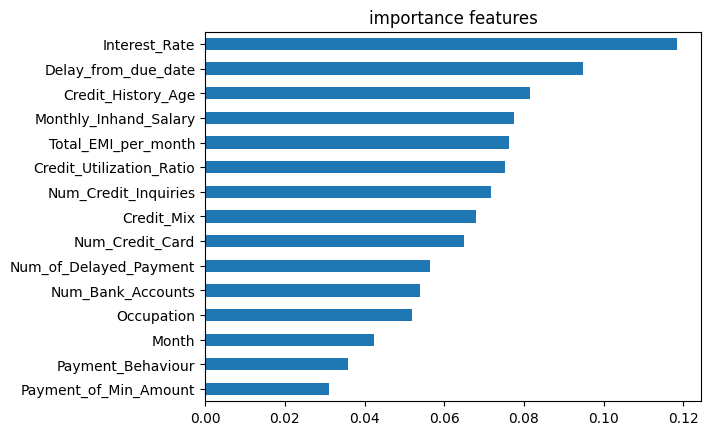

In [45]:
importances = pd.Series(result_clf.feature_importances_, X_train.columns)

plt.title(f'importance features')
importances.sort_values().plot.barh()

In [35]:
from sklearn.model_selection import cross_val_score, cross_validate

In [46]:
## train, test 분리하지 않고 교차 검증으로 학습하기 
model =[DecisionTreeClassifier(max_depth=3),RandomForestClassifier(n_estimators=50)]
name = ['DT','RF']

for model, name in zip(model, name):
    print('###############사용한 알고리즘',name,'#####################')
    for score in ['accuracy','precision_macro','recall_macro','f1_micro']:
        print(score)
        print('-')
        # 교차검증 10회, cross_val_score에서 자동적으로 분류 or 회귀에 따라서 kfold, skfold 변경
        print(cross_val_score(model, train_x, train_y, scoring=score, cv=5)) 

###############사용한 알고리즘 DT #####################
accuracy
-
[0.6483  0.6495  0.6485  0.64605 0.6533 ]
precision_macro
-
[0.61905816 0.61904745 0.61903917 0.61617254 0.62447719]
recall_macro
-
[0.63880165 0.63622613 0.63711704 0.63413103 0.64475433]
f1_micro
-
[0.6483  0.6495  0.6485  0.64605 0.6533 ]
###############사용한 알고리즘 RF #####################
accuracy
-
[0.665   0.6727  0.6711  0.66685 0.68105]
precision_macro
-
[0.63998322 0.64495393 0.64543821 0.64075072 0.65159069]
recall_macro
-
[0.65316574 0.65548625 0.65007281 0.65314116 0.66169275]
f1_micro
-
[0.668   0.67505 0.669   0.66555 0.67735]
